In [ ]:
# Install necessary libraries
!pip install tensorflow kaggle

# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Setup Kaggle API
from google.colab import files
files.upload()  # Upload kaggle.json for Kaggle API

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Download dataset from Kaggle
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset
!unzip face-expression-recognition-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
# Define paths
train_dir = 'images/train/'
validate_dir = 'images/validation/'  # Assuming test is used for validation

# Image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # Adjust size according to dataset
    batch_size=32,
    color_mode='grayscale',  # Adjust based on dataset; grayscale for this dataset
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # Adjust size according to dataset
    batch_size=32,
    color_mode='grayscale',  # Adjust based on dataset; grayscale for this dataset
    class_mode='categorical',
    subset='validation'
)


Found 23060 images belonging to 7 classes.
Found 5761 images belonging to 7 classes.


In [ ]:
# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 emotion classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/50
720/720 [==============================] - 97s 131ms/step - loss: 1.7592 - accuracy: 0.2792 - val_loss: 1.6011 - val_accuracy: 0.3750
Epoch 2/50
720/720 [==============================] - 96s 133ms/step - loss: 1.5156 - accuracy: 0.4079 - val_loss: 1.4292 - val_accuracy: 0.4408
Epoch 3/50
720/720 [==============================] - 92s 128ms/step - loss: 1.3683 - accuracy: 0.4735 - val_loss: 1.3557 - val_accuracy: 0.4781
Epoch 4/50
720/720 [==============================] - 93s 129ms/step - loss: 1.2720 - accuracy: 0.5144 - val_loss: 1.3336 - val_accuracy: 0.4920
Epoch 5/50
720/720 [==============================] - 93s 129ms/step - loss: 1.1935 - accuracy: 0.5413 - val_loss: 1.3189 - val_accuracy: 0.4969
Epoch 6/50
720/720 [==============================] - 93s 129ms/step - loss: 1.1174 - accuracy: 0.5709 - val_loss: 1.2712 - val_accuracy: 0.5111
Epoch 7/50
720/720 [==============================] - 88s 122ms/step - loss: 1.0495 - accuracy: 0.6036 - val_loss: 1.2798 - val_ac

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {accuracy}")

181/181 [==============================] - 7s 39ms/step - loss: 5.5417 - accuracy: 0.5143
Validation loss: 5.541717529296875
Validation accuracy: 0.514320433139801


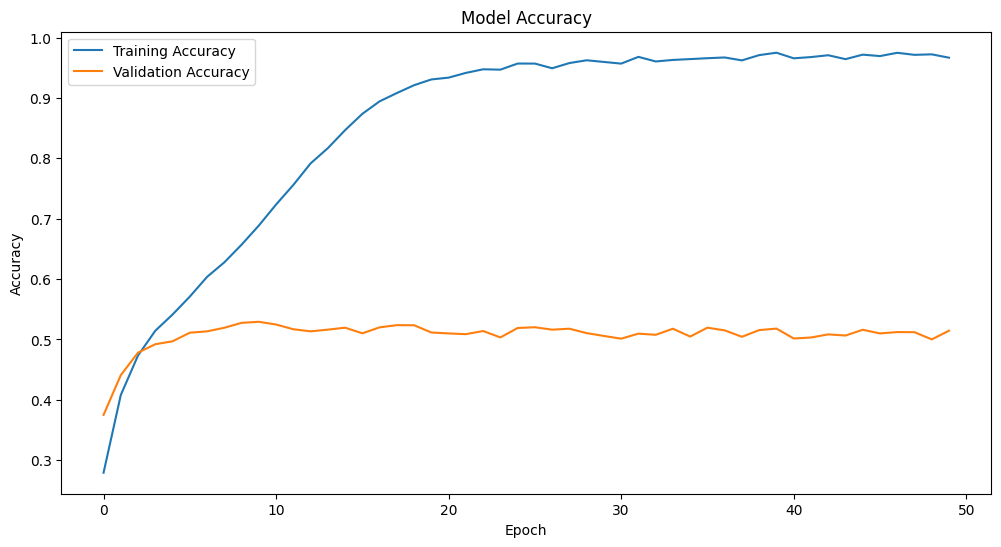

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


181/181 [==============================] - 12s 67ms/step
Classification Report:

              precision    recall  f1-score   support

       angry       0.15      0.15      0.15       798
     disgust       0.00      0.00      0.00        87
        fear       0.15      0.15      0.15       820
       happy       0.26      0.28      0.27      1432
     neutral       0.16      0.17      0.17       996
         sad       0.17      0.15      0.16       987
    surprise       0.13      0.13      0.13       641

    accuracy                           0.18      5761
   macro avg       0.15      0.15      0.15      5761
weighted avg       0.18      0.18      0.18      5761



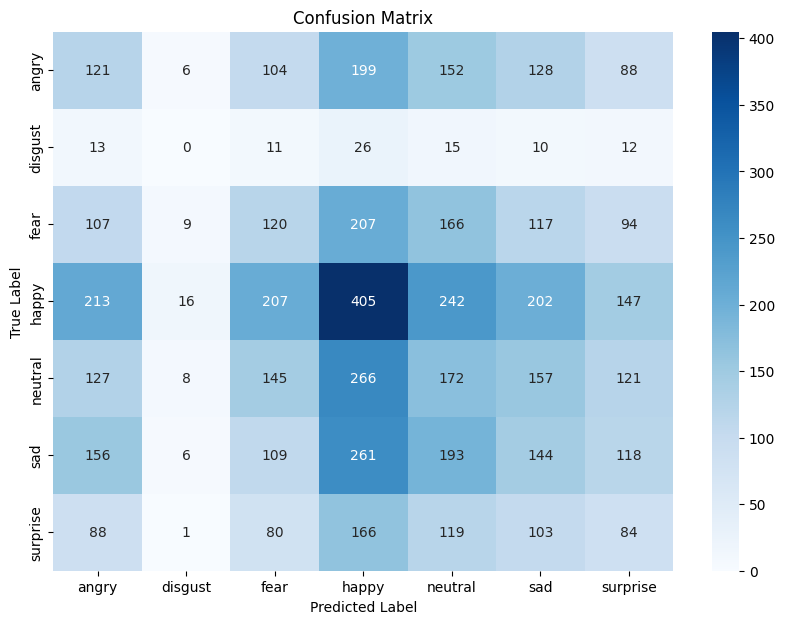

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict the classes for validation data
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from validation generator
true_classes = validation_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print("Classification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict the classes for validation data
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from validation generator
true_classes = validation_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Calculate accuracy for each emotion class
class_names = list(validation_generator.class_indices.keys())
accuracy_per_class = {}

for i, class_name in enumerate(class_names):
    true_positive = conf_matrix[i, i]
    total = np.sum(conf_matrix[i, :])
    accuracy = (true_positive / total) * 100
    accuracy_per_class[class_name] = accuracy

# Print accuracy for each emotion
print("Accuracy for each emotion class:")
for class_name, accuracy in accuracy_per_class.items():
    print(f"{class_name}: {accuracy:.2f}%")


181/181 [==============================] - 9s 52ms/step
Accuracy for each emotion class:
angry: 16.42%
disgust: 0.00%
fear: 12.32%
happy: 28.28%
neutral: 19.88%
sad: 14.69%
surprise: 10.76%


In [ ]:
from sklearn.metrics import accuracy_score

# Predict the classes for validation data
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes from validation generator
true_classes = validation_generator.classes

# Compute overall accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes) * 100
overall_accuracy1 = accuracy_score(true_classes, predicted_classes)
print(f"Overall Accuracy: {overall_accuracy1}%")

# Print overall accuracy
print(f"Overall Accuracy: {overall_accuracy:.2f}%")


181/181 [==============================] - 8s 45ms/step
Overall Accuracy: 0.17896198576636%
Overall Accuracy: 17.90%


In [ ]:
model.save('emotion_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
